In [20]:
# ???
# idea: multi-qubit gates formed by 2Q interactions, similar to multi-block
# maybe a V gate is defined by 2 points at iSwap, Delta by 3 points at iSwap
# gates can be defined by a vector of coordinates.
# only works because there is no 3Q interaction, just multiple 2Q interactions at the same time

In [21]:
# TODO
# given interaction sliders
# update colored points,
# update ouput final matrix
# # building interactive example
# interaction1 = QubitInteraction(np.pi / 2, 0)
# interaction2 = QubitInteraction(np.pi / 4, np.pi / 4)
# sys = QubitSystem([(interaction1, (0, 1)), (interaction2, (1, 2))], 3)
# sys.display()

In [22]:
from weylchamber import c1c2c3, WeylChamber
from quantum_logical.conversiongain import (
    QubitSystem,
    QubitInteraction,
    ParameterizedUnitaryGate,
)
from qiskit import QuantumCircuit
import numpy as np

In [23]:
# 2 qubit example, verify find iSwapGate
interaction = QubitInteraction(np.pi / 2, 0)
sys = QubitSystem([(interaction, (0, 1))], 2)
unitary = sys.construct_U(t=1.0)
print(unitary)
print(c1c2c3(unitary))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
(0.5, 0.5, 0.0)


In [31]:
# ground truth is [(np.pi/2, 0), (np.pi/4, np.pi/4)]
qi1 = QubitInteraction(np.pi / 4, 0)
qi2 = QubitInteraction(np.pi / 4, 0)
qubit_system = QubitSystem([(qi1, (0, 1)), (qi2, (1, 2))], 3)
target_gate = ParameterizedUnitaryGate(qubit_system)

(0.25, 0.25, 0.0)
(0.25, 0.25, 0.0)


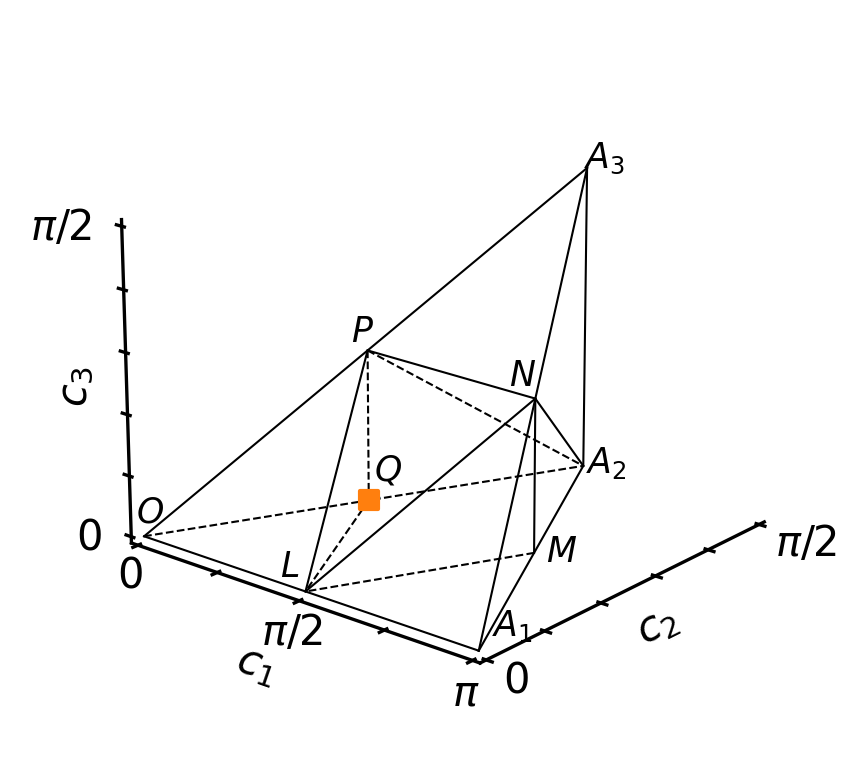

In [32]:
# plot ground truth pair
w = WeylChamber()
coord = c1c2c3(qi1.construct_U(t=1.0))
print(coord)
w.scatter(*coord, marker="*")
coord = c1c2c3(qi2.construct_U(t=1.0))
print(coord)
w.scatter(*coord, marker="s")
w.plot()

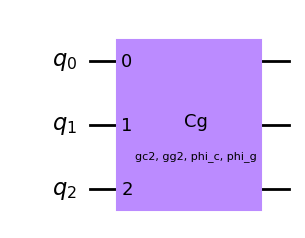

In [33]:
# building parameterized Gate

# Create QubitInteraction objects
qi1 = QubitInteraction(3 * np.pi / 8, 0)
qi2 = QubitInteraction("gc2", "gg2", "phi_c", "phi_g")

# Create QubitSystem
qubit_system = QubitSystem([(qi1, (0, 1)), (qi2, (1, 2))], 3)

# Create ParameterizedUnitaryGate
param_gate = ParameterizedUnitaryGate(qubit_system)

qc = QuantumCircuit(3)
qc.append(param_gate, range(3))
qc.draw("mpl")

In [34]:
from transpile_benchy.utilities.numerical_decomp import BasicDecomposer

param_gate_lambda = lambda: param_gate
decomp = BasicDecomposer([(param_gate_lambda, 0)])
# we are looking for a gate equivalence, so no basis gate applications
decomp.max_iterations = 1
decomp.include_1q = False
ret = decomp.decompose(target=target_gate, parameter_count_overide=4)

False
0.06306084095193298


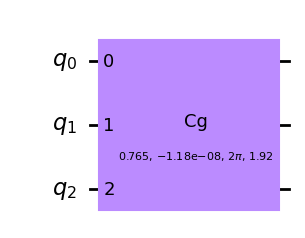

In [35]:
print(decomp.converged)
print(decomp.best_cost)
ret.draw("mpl")

(0.375, 0.375, 0.0)
(0.24352946, 0.24352345, 0.0)


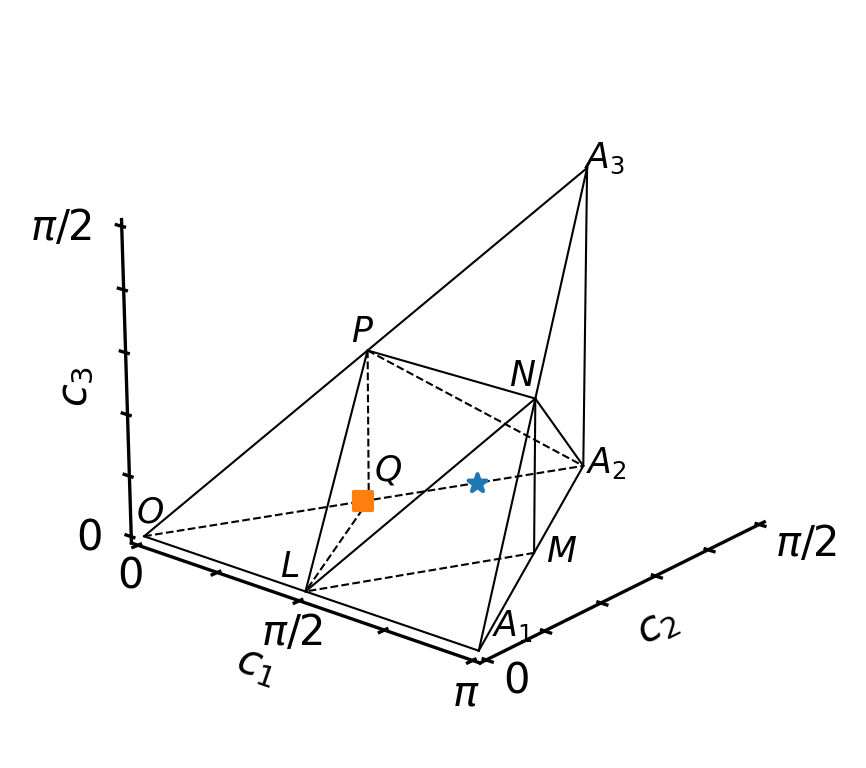

In [36]:
# plot found solution
w = WeylChamber()
for i, qi in enumerate(
    ret.get_instructions(name="CG")[0].operation.qubit_system.qubit_interactions
):
    coord = c1c2c3(qi[0].construct_U(t=1.0))
    print(coord)
    w.scatter(*coord, marker=["*", "s"][i])
w.plot()